## Probability theory

*Discrete Variables and Probability Mass Functions.*

Probaility mass functions with a capital **P**.
The probability mass function maps from a state of a random variable to the probability of that random variable taking on that state.
The probability of x being x_i.

$$
    P(x=x_{i})
$$

------------------------------------------------------------------------------------------------------------------------

In order to be a probaility mass function on a random variable x.

• The domain of P must be the set of all possible states of x.

• Max probability 1, min prob 0.
$$
    ∀x ∈ x,0 ≤ P(x) ≤ 1.
$$

• We refer to this property as being normalized

$$
    \sum_{x∈X}P(x) = 1
$$

------------------------------------------------------------------------------------------------------------------------

For instance. Discrete random variable x with k different states.

And set **uniform distribution** on x—that is, make each of its states equally likely.

$$
    P(x=x_{i}) = 1/k
$$

We can see that this fits the requirements for a probability mass function.

\*Note that we often denote that x follows the uniform distribution on [a, b] by writing x ∼ U(a,b).*

------------------------------------------------------------------------------------------------------------------------

*Continuous Variables and Probability Density Functions*

**Probability density function** must satisfy.

• The domain of p must be the set of all possible states of x.


• Note that we do not require p(x) ≤ 1.

$$
    \sum_{x ∈ X}p(x) ≥ 0.
$$

and

•
$$
    \int_{}p(x)dx = 1
$$

In a univariate(including countable variables) example, the probability that x lies in the interval [a, b] is given by.

$$
    \int_{[a,b]} p(x)dx.
$$

------------------------------------------------------------------------------------------------------------------------

*Conditional probaility.*

$$
    P(y=y_{i}|x=x_{i})=\frac{P(y=y_{i},x=x_{i})}{P (x = x_{i})}
$$

*Independence and Conditional Independence*

Two random variables x and y are independent if

$$
    ∀x∈x_{i},y∈y_{i}, p(x=x_{i},y=y_{i})=p(x=x_{i})*p(y=y_{i})
$$

x⊥y - x and y are independent.

x⊥y | z means that x and y are conditionally independent given z.

------------------------------------------------------------------------------------------------------------------------

*Expectation, Variance and Covariance*

Def. The **expectation** or **expected value** of some function f(x) with respect to a probability distribution P (x) is the average or mean value that f takes on when x is drawn from P.

$$
    E_{x∼P} [f (x)] = \sum_{x} P (x)f (x)
$$

while for continues vars it is.

$$
    E_{x∼P} [f (x)] = \int p (x)f (x) dx
$$

When the identity distribution is obviouse in context then, we use

$$
    E_{x}[f(x)]
$$

Expectations are linear.

$$
    E_{x}[αf(x) + βg(x)] = αE_{x}[f(x)] + βE_{x}[g(x)]
$$

when α and β are not dependent on x.

The **variance** gives a measure of how much the values of a function of a random variable x vary as we sample different values of x from its probability distribution.

$$
    Var(f(x)) = E[(f(x) - E[f(x)])^2]
$$

The **covariance** gives some sense of how much two values are linearly related to each other, as well as the scale of these variables.

$$
    Cov(f(x), g(x)) = E[(f(x) - E[g(x)])(g(y) - E[g(y)])]
$$

If the sign of the covariance is positive, then both variables tend to take on relatively high values simultaneously. If the sign of the covariance is negative, then one variable tends to take on a relatively high value at the times that the other takes on a relatively low value and vice versa.

#### Common Probability Distributions

*Bernoulli Distribution*

The Bernoulli distribution is a distribution over a single binary random variable.

$$
    φ ∈ [0,1]
$$

$$
    P(x = 1) = φ
$$

$$
    P (x = 0) = 1 − φ 
$$

$$
    P(x = x) = φ^x(1 − φ)^{1−x}
$$

$$
    E_{x}[x] = φ
$$

$$
    Var_{x}(x) = φ(1 − φ)
$$

In [194]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [39]:
def bernoulli(u):
    if random.random() >= u:
        return 1
    return 0

def bernoulli_prob(x, u):
    return (u**x) * (1-u)**(1-x)

def bernoulli_exp(u):
    return u

def bernoulli_var(u):
    return u * (1 - u)

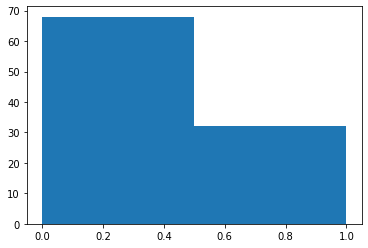

In [40]:
x = [bernoulli(0.7) for i in range(100)]
y = [bernoulli_prob(x_, 0.7) for x_ in x]

plt.hist(x, bins=2)
plt.show()

In [41]:
bernoulli_exp(0.7), bernoulli_var(0.7)

(0.7, 0.21000000000000002)

*Gaussian Distribution*

$$
    N(x;μ,σ^2)= \sqrt{\frac{1}{2πσ^2}} * exp(-\frac{1}{2σ^2}*(x-μ)^{2})
$$

$$
    μ ∈ R 
$$

$$
    σ ∈ (0,∞) 
$$

$$
    E[x] = μ
$$

The standard deviation of the distribution is given by σ, and the variance by σ^2.

In [185]:
def normal_prob(x, u, v):
    return (1 / (2*np.pi*v))**0.5 * np.exp(-1/(2*v) * (x-u)**2)

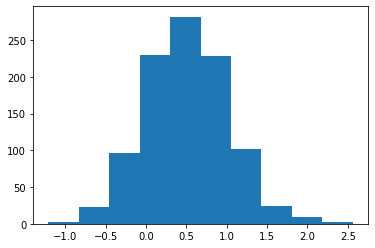

In [186]:
plt.hist(np.random.normal(0.5, 0.5, 1000))
plt.show()

*Bayes’ Rule*

If we want to find P(x|y) and we know P(y|x) and P(x).

$$
    P(x | y) = \frac{P(x)P(y | x)}{P (y)}
$$

where P(y) is

$$
    P(y) = \sum_{x} P(y | x)P(x)
$$

## Information theory

**Information theory** is a branch of applied mathematics that revolves around quantifying how much information is present in a signal.
The basic intuition behind information theory is that learning that an unlikely event has occurred is more informative than learning that a likely event has occurred. A message saying “the sun rose this morning” is so uninformative as to be unnecessary to send, but a message saying “there was a solar eclipse this morning” is very informative.

• Likely events should have low information content, and in the extreme case, events that are guaranteed to happen should have no information content whatsoever.

• Less likely events should have higher information content.

• Independent events should have additive information. For example, finding out that a tossed coin has come up as heads twice should convey twice as much information as finding out that a tossed coin has come up as heads once.

**self-information**

$$
    I(x) = −log(P(x))
$$

In [195]:
def self_information(p_x): # probability of something
    return - np.log(p_x)

In [202]:
# the less likely it is the more infomative it is.
print(self_information(0.1), self_information(0.9))

2.3025850929940455 0.10536051565782628


We use log to mean the natural logarithm, with base e. Our
definition of I(x) is therefore written in units of **nats**.
One nat is the information gained by observing an event of probability 1/e.

In [207]:
self_information(1/np.e)

1.0

--- the of this chapter rest is not presented here.